Saved YOLO label to /Users/christosmichalopoulos/Desktop/5ARIP_Images_R/abc/slice_31_max_volume.txt


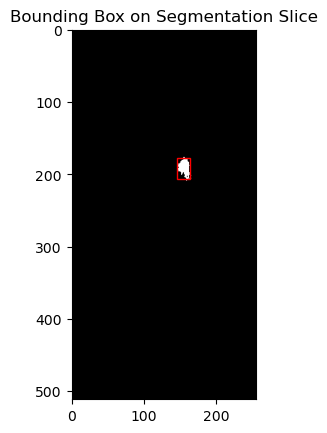

In [24]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt

def create_bounding_box(segmentation_slice):
    # Get the coordinates of tumor 
    tumor_coords = np.argwhere(segmentation_slice == 1)
    
    # If there are no tumor pixels, return a zero-size bounding box
    if tumor_coords.size == 0:
        print('Check other breast')
        return 0, 0, 0, 0

    ymin, xmin = np.min(tumor_coords, axis=0)
    ymax, xmax = np.max(tumor_coords, axis=0)
    
    return xmin, ymin, xmax, ymax

def save_yolo_format(label_file, class_id, xmin, ymin, xmax, ymax, img_width, img_height):
    x_center = (xmin + xmax) / 2 / img_width
    y_center = (ymin + ymax) / 2 / img_height
    bbox_width = (xmax - xmin) / img_width
    bbox_height = (ymax - ymin) / img_height
    
    with open(label_file, 'w') as f:
        f.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

def visualize_bounding_box(segmentation_slice, xmin, ymin, xmax, ymax):
    plt.imshow(segmentation_slice, cmap='gray')
    if xmin != xmax and ymin != ymax:
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='red', facecolor='none', lw=1))
    plt.title('Bounding Box on Segmentation Slice')
    plt.show()

def calculate_tumor_volume(segmentation_data):
    tumor_volume = []
    for slice_index in range(segmentation_data.shape[2]):
        segmentation_slice = segmentation_data[:, :, slice_index]
        tumor_volume.append(np.sum(segmentation_slice == 1))
    return tumor_volume

def find_slice_with_highest_tumor_volume(segmentation_data):
    tumor_volume = calculate_tumor_volume(segmentation_data)
    max_volume_slice_index = np.argmax(tumor_volume)
    max_volume = tumor_volume[max_volume_slice_index]
    return max_volume_slice_index, max_volume

def process_nifti_file(segmentation_file, output_folder, class_id=0):
    img = nib.load(segmentation_file)
    data = img.get_fdata()

    max_volume_slice_index, max_volume = find_slice_with_highest_tumor_volume(data)

    # Get the slice with the highest tumor volume
    segmentation_slice = data[:, :, max_volume_slice_index]
    xmin, ymin, xmax, ymax = create_bounding_box(segmentation_slice)

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    img_width, img_height = segmentation_slice.shape[1], segmentation_slice.shape[0]
    label_file = os.path.join(output_folder, f"slice_{max_volume_slice_index}_max_volume.txt")

    save_yolo_format(label_file, class_id, xmin, ymin, xmax, ymax, img_width, img_height)
    print(f"Saved YOLO label to {label_file}")

    # Visualization
    visualize_bounding_box(segmentation_slice, xmin, ymin, xmax, ymax)

nifti_file_path = '/Users/christosmichalopoulos/Desktop/5ARIP_Images_R/left_p_001_ROI.nii.gz'
output_label_folder = '/Users/christosmichalopoulos/Desktop/5ARIP_Images_R/abc/'
process_nifti_file(nifti_file_path, output_label_folder)


In [ ]:
nifti_file_path = '/Users/christosmichalopoulos/Desktop/5ARIP_Images_R/left_p_001_ROI.nii.gz'
output_label_folder = '/Users/christosmichalopoulos/Desktop/5ARIP_Images_R/abc/'
